# PRÁCTICA MACHINE LEARNING

En esta práctica vamos a resolver el ejercicio propuesto por el profesor de Machine Learning después de haber terminado el curso del mismo.
El ejercicio es un problema de regresión donde tenemos que predecir el precio de alquileres de airbnb a partir de unos datos proporcionados.

## Preparación del Notebook

Vamos a empezar cargando las librerías y las herramientas necesarias para que las celdas del notebook puedan ejecutarse correctamente

In [101]:
from utils import plot_confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Carga de los datos

Los datos están alojados en un csv proporcionado por el profesor, por lo que vamos a usar el comando "read_csv" de pandas para cargar los datos a la variable "air_bnb".
Usaremos ";" como delimitador de las celdas del csv.

In [103]:

air_bnb = pd.read_csv("Proyecto/Proyecto/airbnb-listings-extract.csv", delimiter=';')


## Separación de los datos

Vamos a utilizar la librería de Scikit-learn para separar los datos. Usaremos un 80% de los datos para entrenar el modelo y el 20% restante para probarlo.
Utilizaremos la variable "Price" como variable predictora.

In [105]:
from sklearn.model_selection import train_test_split

X = air_bnb.drop('Price', axis=1) 
y = air_bnb['Price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Estudio y preparación de los datos

Ya que tenemos los datos que vamos a utilizar para entrenar el modelo vamos a estudiar los datos teniendo en cuenta lo que queremos obtener como resultado final. Para empezar, utilizaremos el comando "head" para obtener una visión global de la tabla.

In [107]:
air_bnb.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Podemos ver que con este comando, se muestran las 5 primeras filas de la tabla y nos da una visión general donde se ve que hay muchas variables de descripciones, URLs, características del anfitrión o elementos del scraping que no nos interesa. Vamos a quitarlas.

In [109]:

air_bnb = air_bnb.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 
'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 
    'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
    'License', 'Jurisdiction Names', 'Geolocation', 'Features'], axis=1, errors='ignore')


Vamos a ver también las columnas que tengan una gran cantidad de valores nulos para no contaminar los cálculos.

In [111]:
missings = len(air_bnb) * 0.5
air_bnb = air_bnb.dropna(thresh=missings, axis=1)

Vamosa definir las variables categóricas y a convertirlas en columas "Dummy" para que se pueda usar en modelos de Machine Learning

In [113]:
# Columnas categóricas
categorical_columns = ['season', 'Room Type'] 

# Aplicar pd.get_dummies a cada variable categórica
for col in categorical_columns:
    if col in air_bnb.columns:
        dummies = pd.get_dummies(air_bnb[col], prefix=col)
        air_bnb = pd.concat([air_bnb, dummies], axis=1) 
        air_bnb.drop(col, axis=1, inplace=True) 

# La variable 'Property Type' la vamos a tratar por serparado por ser una variable categórica con muchos valores únicos
air_bnb['Property Type'] = air_bnb['Property Type'].apply(lambda x: x if air_bnb['Property Type'].value_counts()[x] > 50 else 'Other')

air_bnb.head()

,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,none,58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,1.0,...,10.0,10.0,10.0,10.0,moderate,1.0,3.50,True,False,False
1,none,102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,162.0,...,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,True,False,False
2,none,102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,162.0,...,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,True,False,False
3,none,131794,Damien,2010-05-25,"Barcelona, Cataluña, Spain",Welcome home! You could call me a globetrotter...,within an hour,100.0,El Born,27.0,...,10.0,10.0,10.0,9.0,strict,24.0,1.09,True,False,False
4,none,54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,99.0,L'Antiga Esquerra de l'Eixample,207.0,...,NaN,NaN,NaN,NaN,flexible,92.0,NaN,True,False,False


Vamos a estudiar la correlación para ver si existen variables redundantes o con baja correlación. Para ello usaremos solo las variables que están compuestas por números

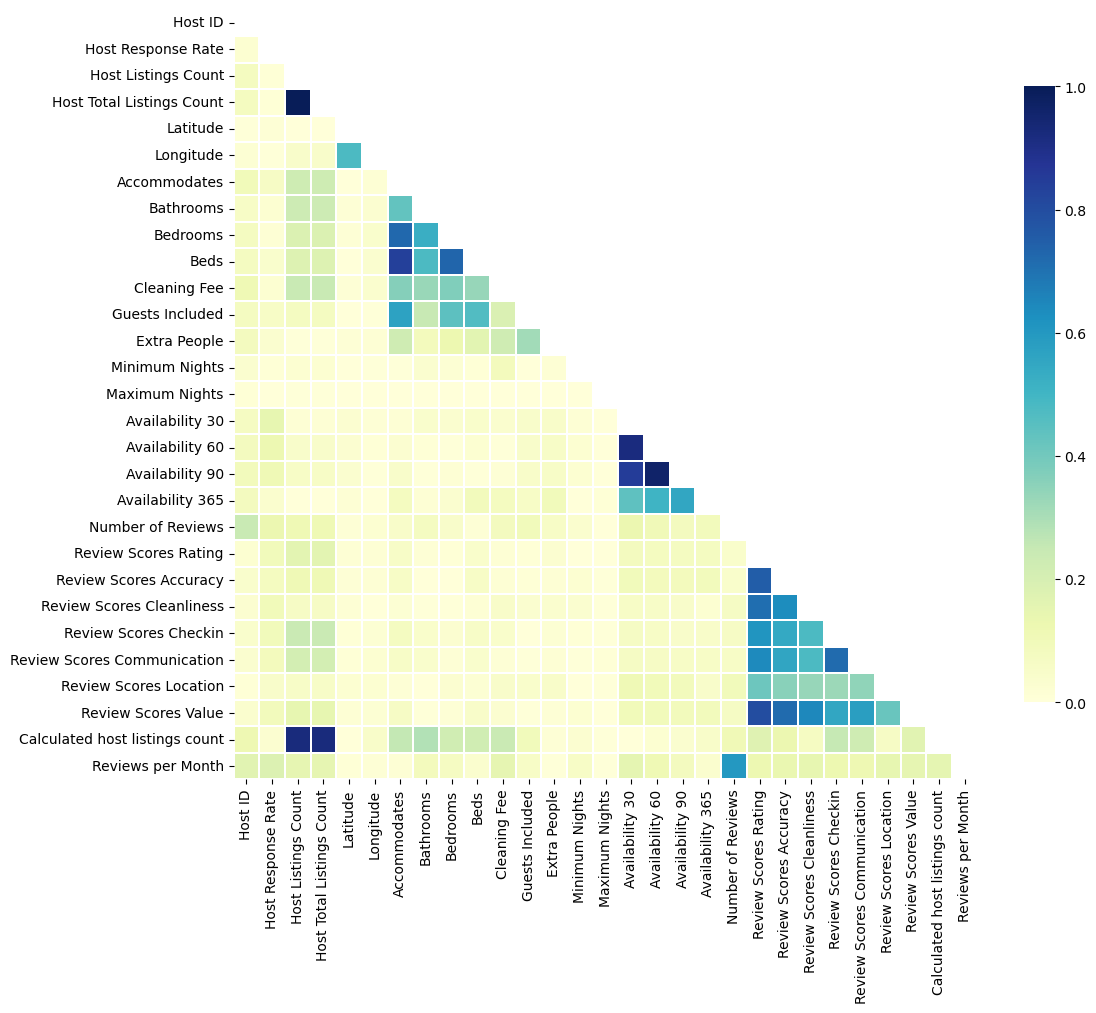

In [115]:
import seaborn as sns
numeric_data = air_bnb.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = np.abs(numeric_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [116]:
columns_to_drop = [
    'Availability 60',  # Redundante con Availability 30
    'Availability 90',  # Redundante con Availability 30
    'Host Listings Count',  # Redundante con Host Total Listings Count
    'Calculated host listings count',  # Redundante con Host Listings Count
    'Host ID',  # Identificador irrelevante
    'Review Scores Accuracy',  # Muy correlacionada con otras puntuaciones
    'Review Scores Communication'  # Opcional, dependiendo del análisis
]

# Eliminamos las columnas
air_bnb_cleaned = air_bnb.drop(columns=columns_to_drop, errors='ignore')

In [117]:
air_bnb.head()

,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,none,58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,1.0,...,10.0,10.0,10.0,10.0,moderate,1.0,3.50,True,False,False
1,none,102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,162.0,...,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,True,False,False
2,none,102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,162.0,...,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,True,False,False
3,none,131794,Damien,2010-05-25,"Barcelona, Cataluña, Spain",Welcome home! You could call me a globetrotter...,within an hour,100.0,El Born,27.0,...,10.0,10.0,10.0,9.0,strict,24.0,1.09,True,False,False
4,none,54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,99.0,L'Antiga Esquerra de l'Eixample,207.0,...,NaN,NaN,NaN,NaN,flexible,92.0,NaN,True,False,False


## Análisis Exploratorio

Comenzamos con un análisis básico de los datos para entender su estructura y características.

In [119]:
# Descripción general de los datos
print(air_bnb.info())
print(air_bnb.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             14780 non-null  object 
 1   Host ID                         14780 non-null  int64  
 2   Host Name                       14777 non-null  object 
 3   Host Since                      14777 non-null  object 
 4   Host Location                   14737 non-null  object 
 5   Host About                      9539 non-null   object 
 6   Host Response Time              12881 non-null  object 
 7   Host Response Rate              12881 non-null  float64
 8   Host Neighbourhood              10904 non-null  object 
 9   Host Listings Count             14777 non-null  float64
 10  Host Total Listings Count       14777 non-null  float64
 11  Host Verifications              14771 non-null  object 
 12  Street                          

### Valores faltantes

Identificamos las columnas con valores nulos y su proporción.

In [84]:
# Valores faltantes
missing_values = air_bnb.isnull().sum()
missing_values[missing_values > 0] / len(air_bnb) * 100

Host Name                          0.020298
Host Since                         0.020298
Host Location                      0.290934
Host About                        35.460081
Host Response Time                12.848444
Host Response Rate                12.848444
Host Neighbourhood                26.224628
Host Listings Count                0.020298
Host Total Listings Count          0.020298
Host Verifications                 0.060893
Neighbourhood                     35.378890
Neighbourhood Group Cleansed       6.901218
City                               0.040595
State                              0.974290
Zipcode                            3.423545
Market                             0.385656
Country                            0.006766
Bathrooms                          0.372124
Bedrooms                           0.169147
Beds                               0.331529
Amenities                          1.150203
Price                              0.115020
Cleaning Fee                    

### Visualización de distribuciones

Graficamos las distribuciones de las variables más relevantes para entender su comportamiento.

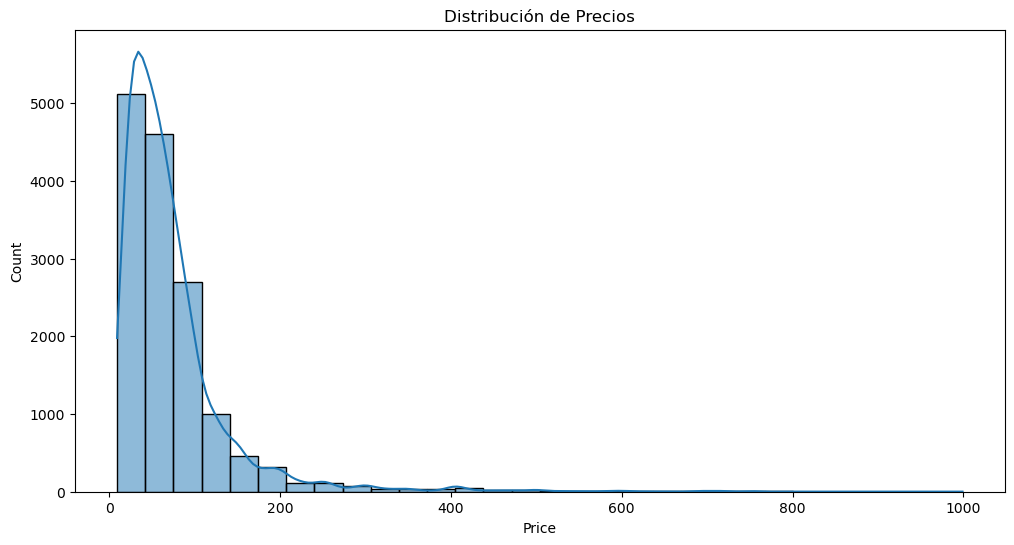

In [128]:
# Distribuciones
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(air_bnb['Price'], kde=True, bins=30)
plt.title('Distribución de Precios')
plt.show()

## Preprocesamiento de Datos

Limpieza y preparación de los datos para su uso en el modelo.

In [138]:
# Eliminar columnas irrelevantes
air_bnb = air_bnb.drop(columns=['Listing Url', 'Name', 'Summary', 'Description', 'Neighborhood Overview'], errors='ignore')

# Manejo de valores nulos
air_bnb['Bathrooms'].fillna(air_bnb['Bathrooms'].median(), inplace=True)
air_bnb['Beds'].fillna(air_bnb['Beds'].median(), inplace=True)

## Modelado

Entrenamos dos modelos de regresión: Regresión Lineal y Random Forest.

In [179]:
# Asegurar que no haya valores NaN en los datos antes de ajustar el modelo
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)

# Modelo 1: Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Modelo 2: Random Forest
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

## Evaluación

Comparamos los modelos utilizando métricas y visualizaciones.

In [181]:
# Métricas
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Regresión Lineal - MSE: {linear_mse:.2f}, R²: {linear_r2:.2f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")

Regresión Lineal - MSE: 3158.71, R²: 0.38
Random Forest - MSE: 1598.70, R²: 0.69


### Visualización de resultados

Comparamos el desempeño de los modelos mediante gráficos.

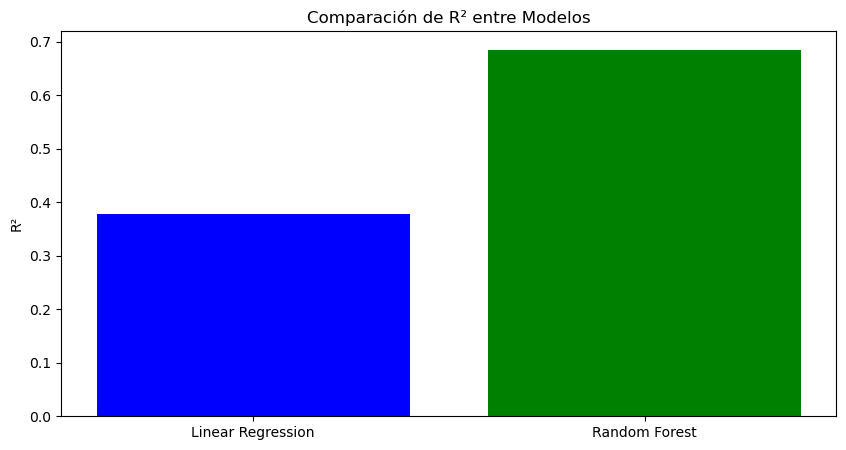

In [186]:
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Random Forest'], [linear_r2, rf_r2], color=['blue', 'green'])
plt.title('Comparación de R² entre Modelos')
plt.ylabel('R²')
plt.show()

### Conclusión

Tras el entrenamiento y evaluación de ambos modelos, podemos concluir lo siguiente:

El modelo **Random Forest** ofrece un desempeño más equilibrado y generalizable en comparación con la regresión lineal. El modelo de **Regresión Lineal** alcanza un \($R^2 = 0.38$) y un MSE de $3158.71$ ,  lo que limita su capacidad para realizar predicciones en datos.

Por otro lado, el modelo **Random Forest** proporciona un MSE de $1598.70$ y un \($R^2 = 0.69\$). Estos valores reflejan un modelo que no está sobreajustado y tiene un mejor equilibrio entre sesgo y varianza. Esto sugiere que Random Forest puede capturar mejor las relaciones subyacentes en los datos y ofrecer predicciones más robustas para datos nuevos.

En resumen, **Random Forest** es la opción preferida en este caso, ya que combina un error razonable con una capacidad adecuada de generalización.
